In [1]:
!pip install vaderSentiment==3.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/cleaned_data.csv")
df.head()

,text_length,cleaned_statement,status,label
0,8,im lazy complain ba ihh,Normal,3.0
1,26,think wifi iphone broken quot connect quot act...,Normal,3.0
2,78,good tracking apps ive trying find apps track ...,Bipolar,1.0
3,655,recently looked reddit found place actually qu...,Depression,2.0
4,6,thats favorite thing,Normal,3.0


As our data is already cleaned we will directly jump to feature extraction part here
2. Feature Extraction (VADER doesn't need vectorization)

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Ensure 'cleaned_statement' column contains strings
df['cleaned_statement'] = df['cleaned_statement'].astype(str)

# Get compound scores
df['compound'] = df['cleaned_statement'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Assign sentiment label
def get_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['compound'].apply(get_sentiment)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convert sentiments to numbers (optional for ML)
df['label'] = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_statement'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.92      0.94      0.93      9968
           0       0.83      0.78      0.81      1565
           1       0.91      0.90      0.91      7171

    accuracy                           0.91     18704
   macro avg       0.89      0.87      0.88     18704
weighted avg       0.91      0.91      0.91     18704



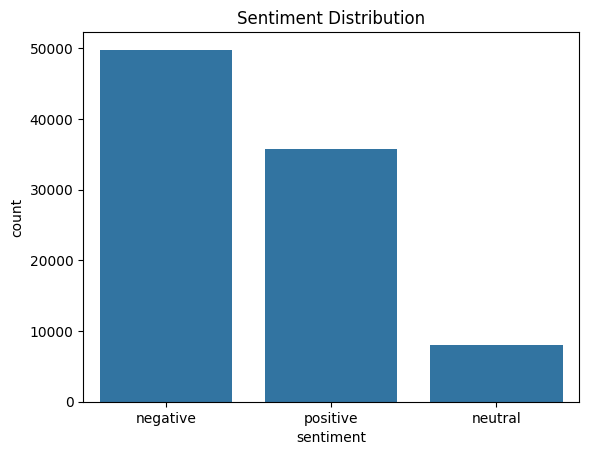

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

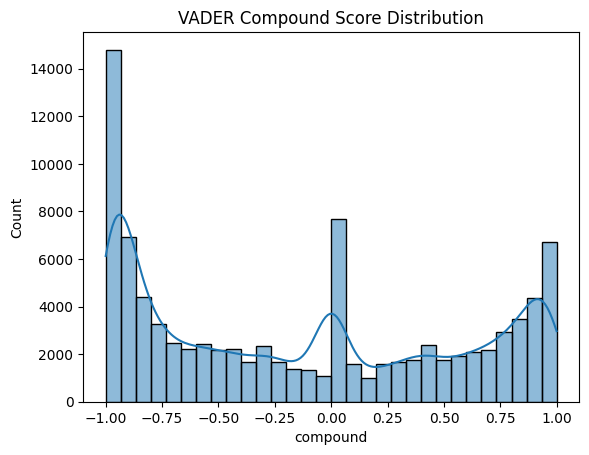

In [8]:
sns.histplot(df['compound'], bins=30, kde=True)
plt.title("VADER Compound Score Distribution")
plt.show()

In [9]:
df.to_csv("sentiment_analysis_results.csv", index=False)


In [10]:
import joblib

# Save the trained model
joblib.dump(clf, 'sentiment_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [11]:
import joblib

# Load the trained model
loaded_model = joblib.load('sentiment_model.pkl')

# Load the vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [12]:
# New text data for inference
new_text = ["This is a great product!"]

# Transform the new text using the loaded vectorizer
new_text_vectorized = loaded_vectorizer.transform(new_text)

# Make prediction using the loaded model
prediction = loaded_model.predict(new_text_vectorized)

# Print the prediction
print(prediction)

[1]


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Ensure 'cleaned_statement' column contains strings
df['cleaned_statement'] = df['cleaned_statement'].astype(str)

# Get compound scores
df['compound'] = df['cleaned_statement'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Assign sentiment label
def get_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['compound'].apply(get_sentiment)

In [14]:
df

,text_length,cleaned_statement,status,label,compound,sentiment
0,8,im lazy complain ba ihh,Normal,-1,-0.6124,negative
1,26,think wifi iphone broken quot connect quot act...,Normal,-1,-0.4767,negative
2,78,good tracking apps ive trying find apps track ...,Bipolar,1,0.2732,positive
3,655,recently looked reddit found place actually qu...,Depression,1,0.9967,positive
4,6,thats favorite thing,Normal,1,0.4588,positive
...,...,...,...,...,...,...
93512,236,feeling lately birthday day bit depressing spe...,Personality disorder,1,0.9216,positive
93513,849,fear death potential comfort instrument deep i...,Personality disorder,1,0.7702,positive
93514,140,avpd lack sense selfidentity hope ’ okay ’ mak...,Personality disorder,-1,-0.4779,negative
93515,265,want resign job hey ’ really struggling moment...,Personality disorder,1,0.2004,positive


In [15]:
df.to_csv("sentiment_analysis_results.csv", index=False)